In [88]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [90]:
from load_datasets import *
from BinarizedSVM import BinarizedSVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LeaveOneOut
import numpy as np

In [91]:
datasets = load_all()

In [ ]:
performances_df = []
for dataset in datasets:
    print(dataset['name'])

    X, y = dataset['X'], dataset['y']

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    svm = BinarizedSVM()
    svm.fit(X, y)
    y_pred = svm.predict(X)
    score = accuracy_score(y_pred, y)

    svc = SVC(kernel='linear')
    svc.fit(X, y)
    y_pred = svc.predict(X)
    sk_score = accuracy_score(y_pred, y)

    performances_df.append({'dataset': dataset['name'],
                            'Baseline': np.sum(y==1)/len(y),
                            'BSVM training acc': score,
                            'Sklearn': sk_score})

sonar


In [63]:
pd.DataFrame(performances_df)

,dataset,Baseline,BSVM training acc,Sklearn
0,sonar,0.533654,0.533654,0.918269
1,bands,0.357401,0.646209,0.819495
2,ionosphere,0.641026,0.641026,0.943020
3,wdbc,0.372583,0.978910,0.987698
4,cleveland,0.181818,0.181818,0.693603
5,housing,0.500000,0.500000,0.893401
6,pima,0.348958,0.644531,0.773438
7,bupa,0.579710,0.579710,0.715942


In [34]:
dataset['y'].values

array([ 1, -1, -1, -1, -1,  1, -1, -1,  1,  1,  1, -1, -1, -1, -1,  1,  1,
        1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1, -1, -1, -1, -1, -1,  1,  1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
       -1,  1,  1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1,
        1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1, -1, -1, -1,
       -1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1, -1, -1, -1,
       -1, -1,  1,  1,  1,  1, -1, -1, -1, -1,  1, -1,  1, -1, -1, -1,  1,
        1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1,  1,  1, -1, -1,
        1,  1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
        1, -1,  1,  1,  1,  1, -1,  1, -1, -1, -1, -1, -1,  1,  1, -1, -1,
        1,  1,  1, -1, -1

In [80]:
from sklearn.model_selection import GridSearchCV, LeaveOneOut
from sklearn.svm import SVC
from sklearn.datasets import load_iris

X, y, names = load_bupa()

param_grid = {'C': [0.1, 1, 10, 100]}

svm = BinarizedSVM()
loo = LeaveOneOut()

grid_search = GridSearchCV(svm, param_grid=param_grid, cv=loo, scoring='accuracy')
grid_search.fit(X, y)

print(grid_search.best_params_)

AttributeError: 'BinarizedSVM' object has no attribute '_get_param_names'

[(14.9, 3.377827707905984e-13), (13.37, 0.6284153004316559)]
[(20.25, 1.9999999999514229), (20.02, 1.9999999999821911), (19.97, 1.9999999999932507), (19.34, 1.9999999999070264), (18.84, 1.9781420765574032)]
[(98.64, -0.38797814181532203), (86.24, -4.125683060161249)]
[(682.5, 1.9999999999743143), (572.6, 0.5737704919499023), (551.1, 0.6284153005003379)]
[(0.1084, 1.9999999999789124), (0.09587, -1.931636287200046)]
[(0.09263, -0.6229508194954426)]
[(0.102, 2.7322404370343625), (0.09769, 1.2896174864487395), (0.06154, 2.612021858220448)]
[(0.05182, 0.7540983606177588), (0.04951, 2.000000000026311), (0.04531, 2.2513661202877646), (0.03821, -0.30054644821744364), (0.0335, 0.38797814198497454)]
[(0.2026, 1.9999999999543916), (0.1893, 0.6031215211647516), (0.1792, -5.346936834848141)]
[(0.06154, -5.866823832946708), (0.05584, -0.04918032804976035)]
[(0.519, 1.9999999999566458), (0.4203, 1.2622950815005312), (0.355, 1.9999999999753793), (0.3242, 0.8443199963331649)]
[(1.108, 1.3836901671247)]

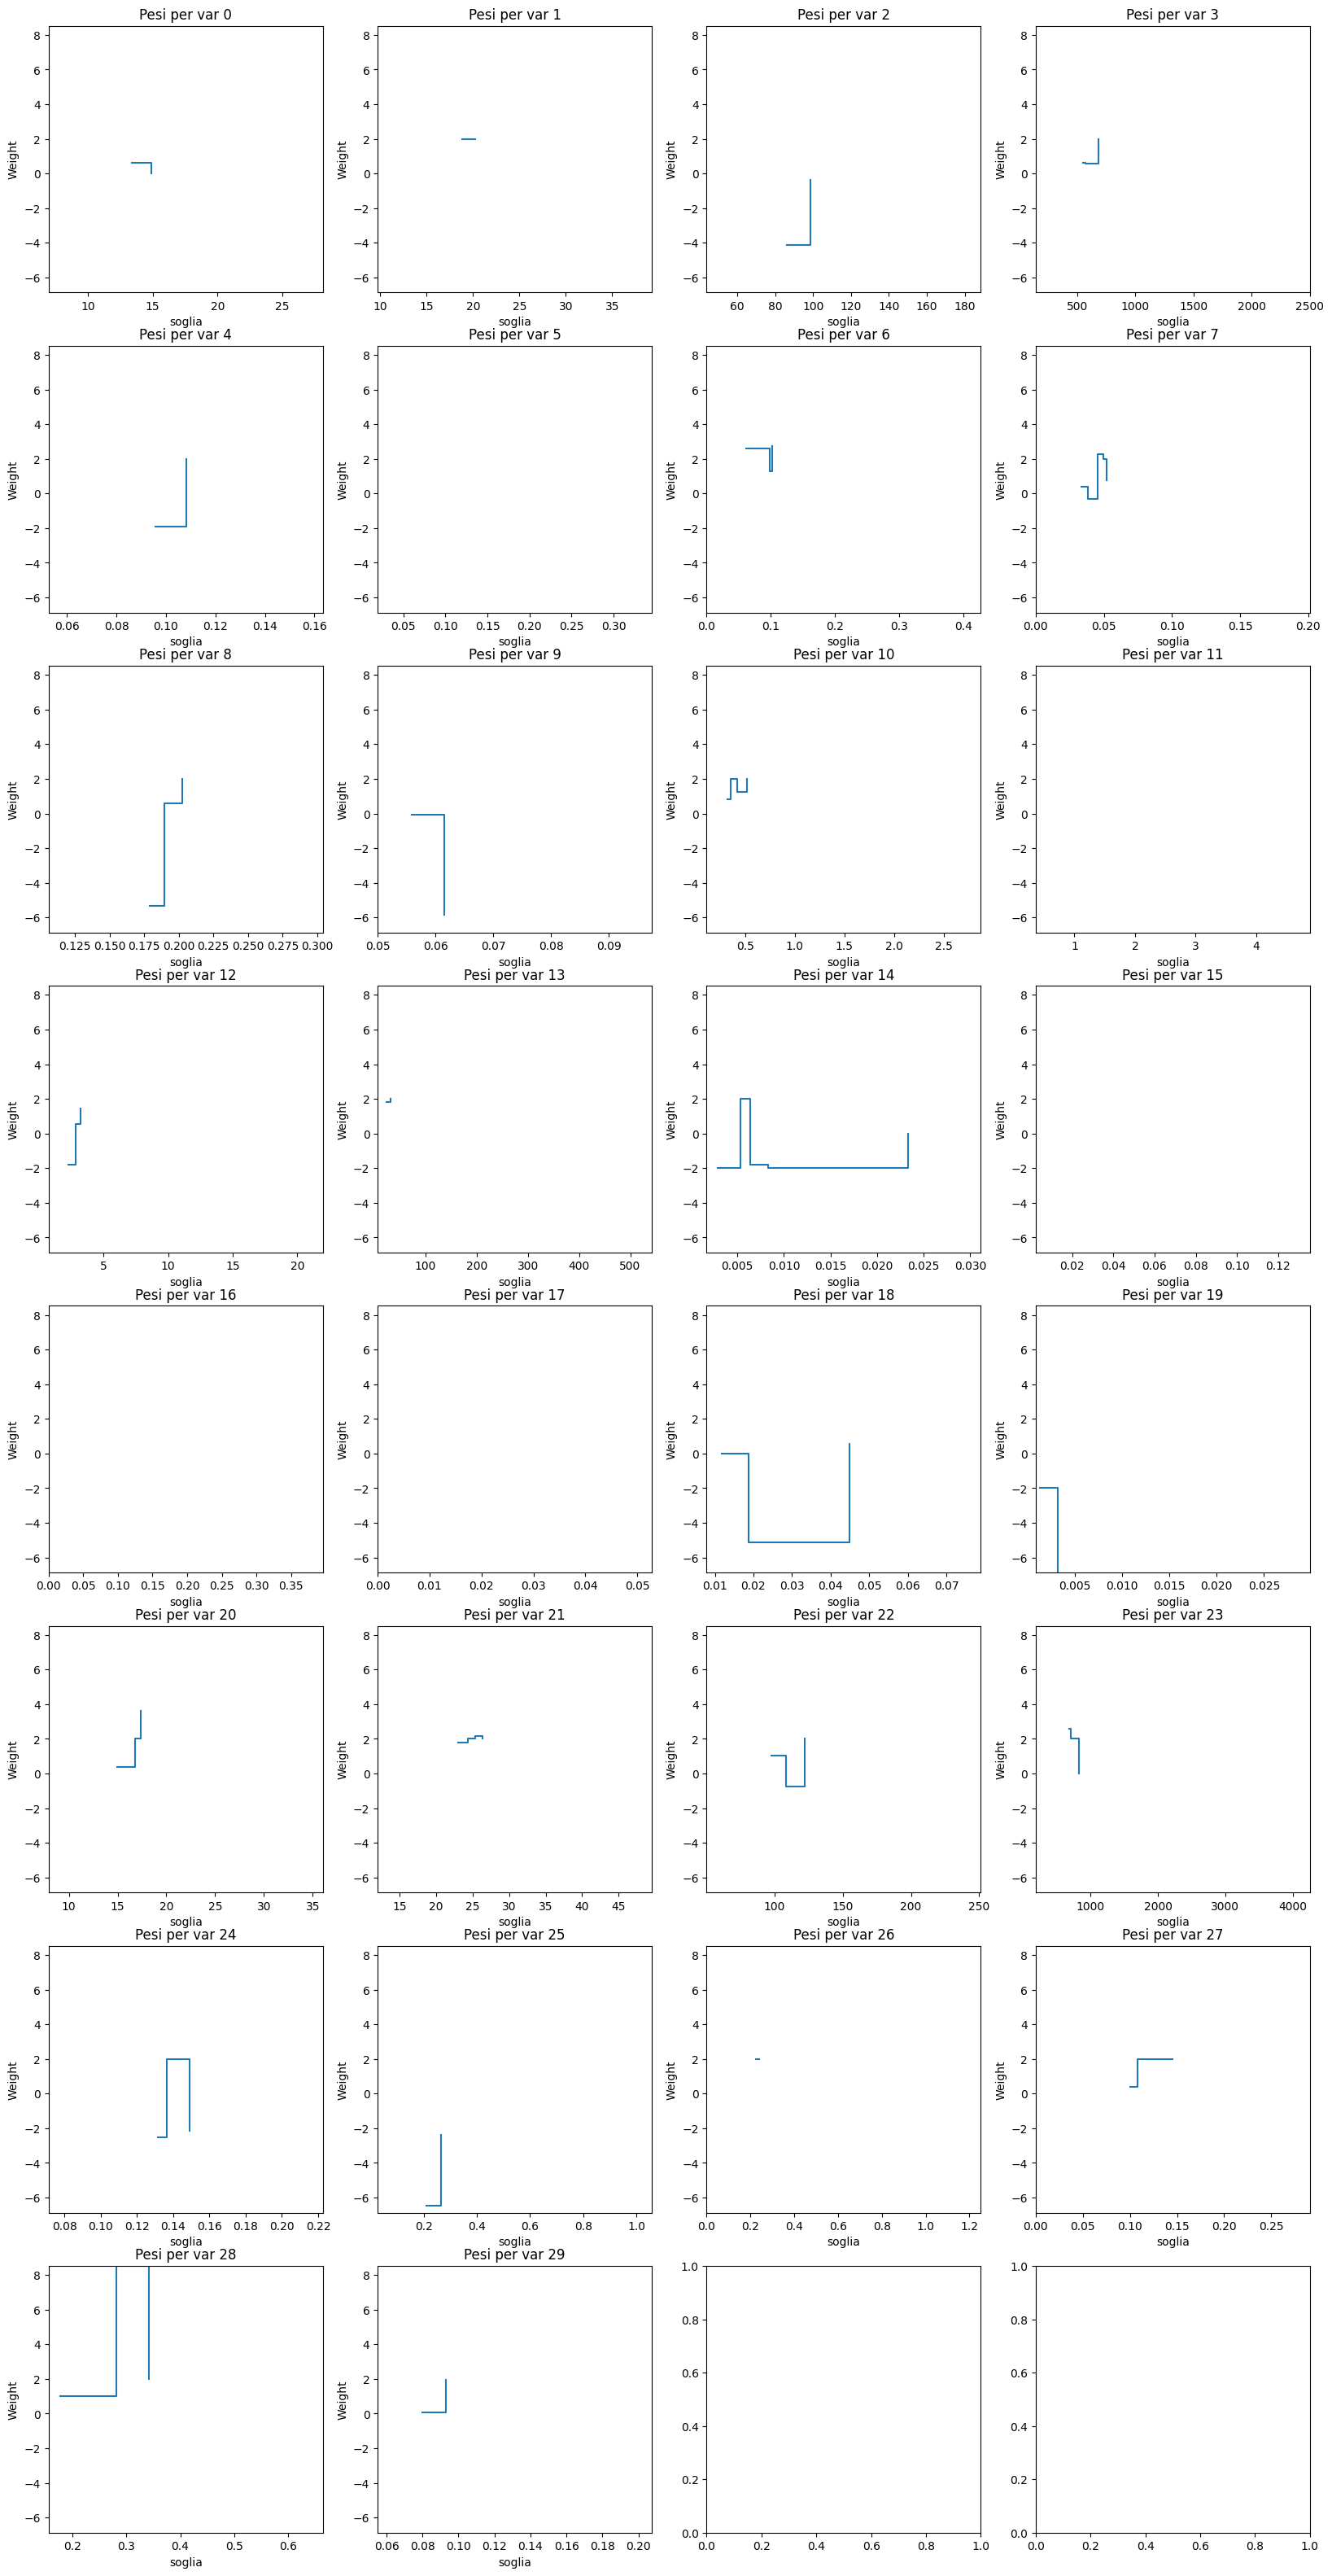

In [83]:
svm = BinarizedSVM()
X, y, names = load_wdbc()
svm.fit(X,y)
svm.visualizza_soglie()